**Vom incepe cu importurile de care avem nevoie in acest proiect.**
Vom folosi:
* Pandas pentru manipularea setului de date
* Matplotlib pentru reprezentarea datelor in figuri (ploturi)
* Numpy pentru manipularea datelor
* Sklearn pentru importarea algoritmului de Machine learning 
* Colab pentru a putea importa fisiere din drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# 1. Intelegerea problemei
Avem de afaceri cu o problema destul de simpla, vom incerca sa prezicem pretul caselor din Bucuresti (care este o valoare, un numar), bazat pe suprafata acestora. In termeni de specialitate, asta inseamna o **regresie**.

Daca am fi vrut sa clasificam casele ca fiind ieftine/scumpe etc, atunci output-ul ar fi fost reprezentat de niste valori boolene si ar fi fost o problema de **clasificare**.

**Exista aplicabilitate?**
<br>Putem folosi acest proiect proiect daca intentionam sa vindem/cumparam un imobil, sau ca si suport pentru agentiile imobiliare.




# 2. Colectarea datelor
Din fericire, am gasit un set de date deja existent pe Kaggle, cu pretul caselor din Bucuresti. Link pentru descarcare [aici](https://www.kaggle.com/denisadutca/bucharest-house-price-dataset).
<br>**Fisierul csv trebuie adaugat in google drive pentru a putea fi importat aici.**

Vom citi fisierul CSV folosind functia `.read_csv()` din libraria pandas, care ne va returna un obiect de tip DataFrame.

In [ ]:
df = pd.read_csv('Bucharest_HousePriceDataset.csv')

# 3. Preprocesarea datelor

Pentru inceput haideti sa vedem on overview al datelor cu care avem de-afaceri. Putem face asta folosind functia `info()` din pandas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nr Camere    3529 non-null   int64  
 1   Suprafata    3529 non-null   float64
 2   Etaj         3529 non-null   int64  
 3   Total Etaje  3529 non-null   int64  
 4   Sector       3529 non-null   int64  
 5   Scor         3529 non-null   int64  
 6   Pret         3529 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 193.1 KB


Fisierul nostru este organizat sub forma unui tabel.
<br>Acest tabel contine **3529 de randuri**, adica perechi de date de antrenare.
<br>Fiecare rand contine **7 coloane**, pe care le vom numi feature-uri. Aceste feature-uri sunt: numarul de camere, suprafata, etaj, total etaje, sector, scor si pret. 

De asemenea, foarte important, se observa ca **nu exista campuri goale** in tabelul nostru.

<br> In continuare, ne vom folosi de functia `describe()` pentru a obtine statistici referitoare la setul nostru de date

In [ ]:
df.describe()

Nr Camere    Suprafata  ...         Scor           Pret
count  3529.000000  3529.000000  ...  3529.000000    3529.000000
mean      2.464154    69.812454  ...     3.098045   97846.330689
std       0.882514    29.086956  ...     1.442990   62844.200384
min       1.000000    16.000000  ...     1.000000   19500.000000
25%       2.000000    52.000000  ...     2.000000   58400.000000
50%       2.000000    63.000000  ...     4.000000   78600.000000
75%       3.000000    81.000000  ...     4.000000  117500.000000
max       9.000000   350.000000  ...     5.000000  495000.000000

[8 rows x 7 columns]

Pe noi ce ne intereseaza in acest punct sunt coloanele `Pret` si `Suprafata`. 
Vedem din aceste statisici ca **pretul mediu de 97.846 euro**, minimul de 19.500 si maximul de 495.000

<br>Ne mai intereseaza si **deviatia standard**, care ne indica cat de mult difera pretul fiecarui apartament fata de media preturilor. Cu alte cuvinte, cata varianta este in pret. 

O deviatie standard mai mica indica faptul ca preturile sunt foarte apropiate, iar o deviatie standard mare indica faptul ca preturile variaza foarte mult.

<br>Mai departe selectam din tabelul nostru doar coloanele ce contin `Pretul` si `Suprafata`, pe care le grupam in doua array-uri diferite: features si target. 

<br> Le schimbam formatul, cu functia reshape, astfel incat dintr-un vector de forma `[numar_de_elemente]` sa avem o matrice de forma `[numar_de_elemente, feature]`. Acesta este formatul impus de modelul importat de libraria pe care o vom folosi. Motivul este acela ca in timpul antrenarii vom agrega mai multe exemple de antrenare in aceeasi matrice, denumita batch. Dar despre acest concept vom discuta in alt tutorial. In cazul nostru avem un singur feature (suprafata) dar am fi putut adauga si alte numere aici. 

In [ ]:
new_data = df[['Suprafata', 'Pret']] # Pastrez doar cele doua coloane din obiectul dataframe
print(f"Shape vechi feature-uri: {new_data['Pret'].shape}")
target = new_data['Pret'].values.reshape(-1, 1) # Selectez doar coloana cu pret
features = new_data['Suprafata'].values.reshape(-1, 1) # Selectez doar coloana cu suprafata
print(f"Shape nou feature-uri: {features.shape}. Shape nou target: {target.shape}")

Shape vechi feature-uri: (3529,)
Shape nou feature-uri: (3529, 1). Shape nou target: (3529, 1)


Urmeaza sa aplicam o **normalizare** a feature-urilor. 
<br> Retele neurale se comporta mult mai bine atunci cand datele de intrare au o medie de 0 si deviatie standard de 1.

<br>In termeni de statistica acest lucru inseamna ca datele au o **distributie normala standard**.

<br>Tipul de normalizare pe care il vom folosi se numeste **Z-score**, si transforma datele astfel incat distributia lor sa devina normala standard.

<br> Formula folosita este urmatoarea:
image.png

Unde:

*  `Z` reprezinta noile noastre date
*  `X` reprezinta datele noastre curente
*  `Miu` reprezinta media pe tot setul de date
*  `Sigma` reprezinta deviatia standard a intregului set de date

Pentru asta vom folosi metoda `fit_transform()` din scikitlearn.

In [ ]:
print(f'Media inainte de normalizare: {int(np.mean(features))}. Deviatia standard inainte de normalizare: {np.std(features)}')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(f'Media dupa normalizare: {int(np.mean(scaled_features))}. Deviatie standard dupa normalizare: {np.std(scaled_features)}')

Media inainte de normalizare: 69. Deviatia standard inainte de normalizare: 29.082834361615728
Media dupa normalizare: 0. Deviatie standard dupa normalizare: 0.9999999999999999


Pentru a evita ca algoritmul nostru sa invete pe derost exemplele din timpul antrenarii, o buna practica este sa **il impartim in doua parti distincte**:


1.   Un subset de train, pe care vom face doar antrenarea (80% din date)
2.   Un subset de test, unde vom pastra date pe care modelul nu le-a mai vazut in timpul antrenarii (20% din date)

Astfel ne asiguram ca modelul este capabil sa generalizeze.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)

# 4. Pipeline de antrenare si testare
A venit si partea mult asteptat! Modelul pe care il vom folosi se numeste **regresie liniara**, care este una dintre cele mai simple forme de retele neurale. 
<br> Tot ce trebuie sa facem acum este sa instantiem obiectul de regresie liniara si sa apelam  functia `.fit()` care porneste antrenamentul.

<br> Rolul acestui tutorial este sa vedem toti pasii prin care trecem intr-un proiect de AI. Nu voi intra in detalii specific aici despre cum functioneaza regresia liniara, dar daca sunteti curiosi, in link-ul de mai jos este o explicatie foarte buna 😁
<br>
https://www.mathsisfun.com/data/least-squares-regression.html

In [ ]:
# Train
model = LinearRegression().fit(X_train, y_train)

Sa testam si **performanta modelului**, folosind subsetul pastrat special pentru asta.
<br>

Mai intai facem predictiile, apoi calculam eroarea folosind functia $RMSE$  (Root Mean Squared Error)
<br>
Rolul unei retele neurale este sa isi actualizeze ponderile astfel incat sa se  minimizeze eroare definita de functia noastra. 

In [ ]:
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

acc = model.score(X_train, y_train)
print("Root Mean Squared Error: {}".format(round(rmse, 2)))
print('Model Accuracy: {}%'.format(round(acc * 100, 2)))  

Root Mean Squared Error: 34891.56
Model Accuracy: 65.54%


64% acuratete si o eroare medie de aproape 40.000 de euro. La prima vedere am fi tentati sa spunem ca algoritmul nu este bun sau ca am facut ceva gresit.

**Aici intervine partea de analiza.**

In primul rand, prima intrebare care imi vine in minte: <br> **Este suficienta doar suprafara pentru a determina pretul unui apartament?**

Intuitiv, pentru ca am ceva cunostinte in domeniu pot spune ca nu. Cu siguranta sunt si alti factori care influenteaza semnificativ pretul precum zona in care este pozitionat, mobilierul, etajul etc.

<br> Aici este usor de vazut. Insa, daca lucrezi cu niste date medicale spre exemplu, unde nu ai expertiza unui medic si nu intelegi ce e acolo, aceste lucruri nu se vad asa de simplu.
<br>(de aceea am tot repetat ca intelegerea problemei e cel mai important pas)
<br>
<br>Asa ca, pentru a valida ipoteza de mai sus, vom construi un **scatter plot** unde putem analiza corelatia dintre suprafata si pret.



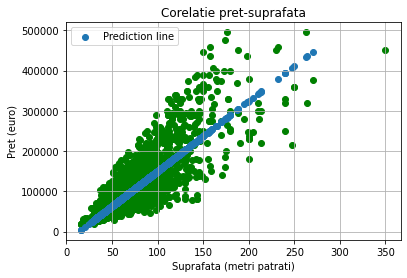

In [ ]:
plt.scatter(new_data['Suprafata'], new_data['Pret'], color='green')
plt.title('Corelatie pret-suprafata')
plt.xlabel('Suprafata (metri patrati)')
plt.ylabel('Pret (euro)')

preds = [model.predict(x.reshape(-1, 1)) for x in X_train] 
plt.scatter(X_train, preds, label='Prediction line')

plt.grid()
plt.legend()
plt.show()

**Cum interpretam?**
<br>
Pe axa X avem suprafata, iar pe axa Y pretul. La intersectia acestor valori punem un punct.

<br>Daca ele ar fi liniar corelate (asta ar insemna ca de fiecare data cand suprafata creste cu o cantitate, si pretul creste proportional cu o cantitate).
<br> In scatter plot-ul nostru, **asta s-ar traduce in puncte care formeaza o linie dreapta.**
<br> Se observa ca nu este cazul. Corelatie este mai puternica cand suprafata este mai mica, si mai slaba cand suprafata creste (punctele sunt mai raspandite).
<br>
Asta inseamna ca mai sunt si alti factori care influenteaza pretul, nu doar suprafata, in special cand suprafata casei este mai mare.

<br> Exista si teste statistice pentru a calcula corelatia (vezi [Spearman Correlation](https://www.youtube.com/watch?v=JwNwbu-g2m0&ab_channel=TopTipBio)), dar nu voi intra in detalii aici.

<br>**In concluzie**, exista o corelatie intre ele dar nu suficient de puternica. Adica ipoteza noastra esta validata: **doar suprafata nu este suficienta pentru a prezice pretul unei case.**



Rolul acestui tutorial este sa va arat un proiect foarte simplu, si ce presupune fiecare pas din schema trimita pe email.
<br> Majoritatea tutorialelor folosesc seturi de date pe care se poate obtine foarte usor acuratete de 99%. Eu am zis sa fac ceva diferit, folosind un dataset real si totodata sa va arat si partea in care identific **de ce nu merge**, care este foarte importanta din punctul meu de vedere.

# 5. Imbunatatirea
Tema pentru casa: incercati sa folositi mai multe feature-uri (spre exemplu locatia), dintre cele disponibile, pentru a prezice pretul. 
<br> **Observati o crestere semnificativa a performantei?**

<br> Un alt experiment interesant ar fi sa ne folosim de coloana cu locatia, si sa incercam sa facem predictia doar pe apartamentele din aceeasi locatie. Tot conteaza foarte mult starea apartamentului, dar predictia ar trebui sa fie un pic mai buna. 



# 6. Productizarea
Fiind un proiect de test, acesta nu va fi pus in productie.
Insa, am putea extrage coeficientii modelului, pe care ii putem folosi in orice mediu/limbaj de programare.

In [ ]:
model.coef_

array([[1738.70384251]])

Fiind vorba despre o regresie liniara, acest coeficient ne spune ca pentru fiecare metru patrat costul creste cu ~1700 de euro.